<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Holographic-Codec/blob/main/HolographicEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Alice's Holographic Engine Ready.

1️⃣  Alice's Input Data (8 points):
    [0.   0.07 0.34 0.62 0.62 0.34 0.07 0.  ]

2️⃣  Running Holographic Encryption...

📡 TRANSMISSION SENT: 'holographic_transmission.pkl'
   - Payload: 3 Qubits (containing 8 encoded floats)
   - Status: Encrypted via MERA Circuit.
   (Upload this file to Bob's notebook)


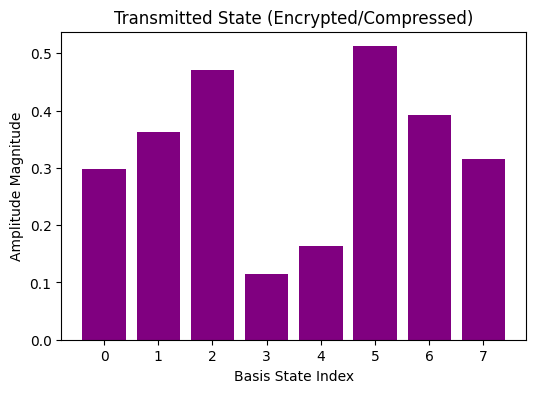

In [ ]:
# @title 🌌 HOLOGRAPHIC COMM PART 1: ALICE (Encoder)
# @markdown ### 🟢 Step 1: Encode & Compress
# @markdown Alice maps 8 data points into 3 Qubits using a specific
# @markdown Holographic Circuit (The Key).

import subprocess
import sys
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Install PennyLane
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Alice's Holographic Engine Ready.")

# ==========================================
# 1. THE SECRET DATA (8-Point Signal)
# ==========================================
# This could be a particle track, a financial trend, or an image row.
original_data = np.array([0.0, 0.1, 0.5, 0.9, 0.9, 0.5, 0.1, 0.0])

# Normalize (Quantum States must have norm 1)
original_data = original_data / np.linalg.norm(original_data)

print(f"\n1️⃣  Alice's Input Data (8 points):")
print(f"    {np.round(original_data, 2)}")

# ==========================================
# 2. THE HOLOGRAPHIC KEY (Circuit Params)
# ==========================================
# This defines the geometry of the MERA circuit.
# Ideally, Alice and Bob agreed on this key beforehand.
SHARED_KEY = np.array([0.5, 0.9, 1.2, 0.3, 0.7])

n_qubits = 3 # 3 Qubits can store 2^3 = 8 Amplitudes

def holographic_mera(params, wires):
    """The Encoder Circuit (Compressor)"""
    # Entanglement Layer
    qml.IsingXX(params[0], wires=[wires[0], wires[1]])
    qml.IsingXX(params[1], wires=[wires[1], wires[2]])

    # Rotation Layer (Encoding)
    qml.RY(params[2], wires=wires[0])
    qml.RY(params[3], wires=wires[1])
    qml.RY(params[4], wires=wires[2])

    # Mixing Layer
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[1], wires[2]])

# ==========================================
# 3. RUNNING THE CIRCUIT
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface='numpy')
def alice_circuit(data, params):
    # 1. Load Data into Amplitudes
    qml.AmplitudeEmbedding(features=data, wires=range(n_qubits), normalize=True, pad_with=0.)

    # 2. Apply Holographic Encryption/Compression
    holographic_mera(params, wires=range(n_qubits))

    # Return the complex state vector
    return qml.state()

print("\n2️⃣  Running Holographic Encryption...")
compressed_state = alice_circuit(original_data, SHARED_KEY)

# ==========================================
# 4. TRANSMISSION
# ==========================================
# We save the state vector. In a real quantum internet, we would send the photons.
transmission_data = {
    "state": np.array(compressed_state), # The Qubits
    "description": "3-Qubit Holographic State"
}

with open("holographic_transmission.pkl", "wb") as f:
    pickle.dump(transmission_data, f)

print(f"\n📡 TRANSMISSION SENT: 'holographic_transmission.pkl'")
print(f"   - Payload: 3 Qubits (containing 8 encoded floats)")
print(f"   - Status: Encrypted via MERA Circuit.")
print("   (Upload this file to Bob's notebook)")

# Visualization of what Alice is sending
plt.figure(figsize=(6, 4))
plt.bar(range(8), np.abs(compressed_state), color='purple')
plt.title("Transmitted State (Encrypted/Compressed)")
plt.xlabel("Basis State Index")
plt.ylabel("Amplitude Magnitude")
plt.show()